In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os
import seaborn as sns
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd

In [4]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the file path to the CSV file
# Change the path to match the location of your CSV file in Google Drive
csv_file_path = '/content/drive/MyDrive/Student_Performance.csv'

# Step 3: Load the CSV file into a Pandas DataFrame
student= pd.read_csv(csv_file_path)

# Step 4: Display the first few rows to verify the data is loaded
student.head()


Mounted at /content/drive


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Small Description of the Dataset

Description:

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:

Hours Studied: The total number of hours spent studying by each student.

Previous Scores: The scores obtained by students in previous tests.

Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

Sleep Hours: The average number of hours of sleep the student had per day.

Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

In [38]:
del student
#Code kept for restarting work

# A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? [5 points]

In [5]:
student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


The Student Performance Dataset has a total of 10,000 rows and 6 columns containing data on the Performnce Index, Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours & Sample Question Papers Practiced.

Performance Index is continious valued and Extracurricular Activities is categorical which takes values between Yes or No.

The rest of the features take discreate values i.e. integers.

# B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? [5 points]



In [6]:
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


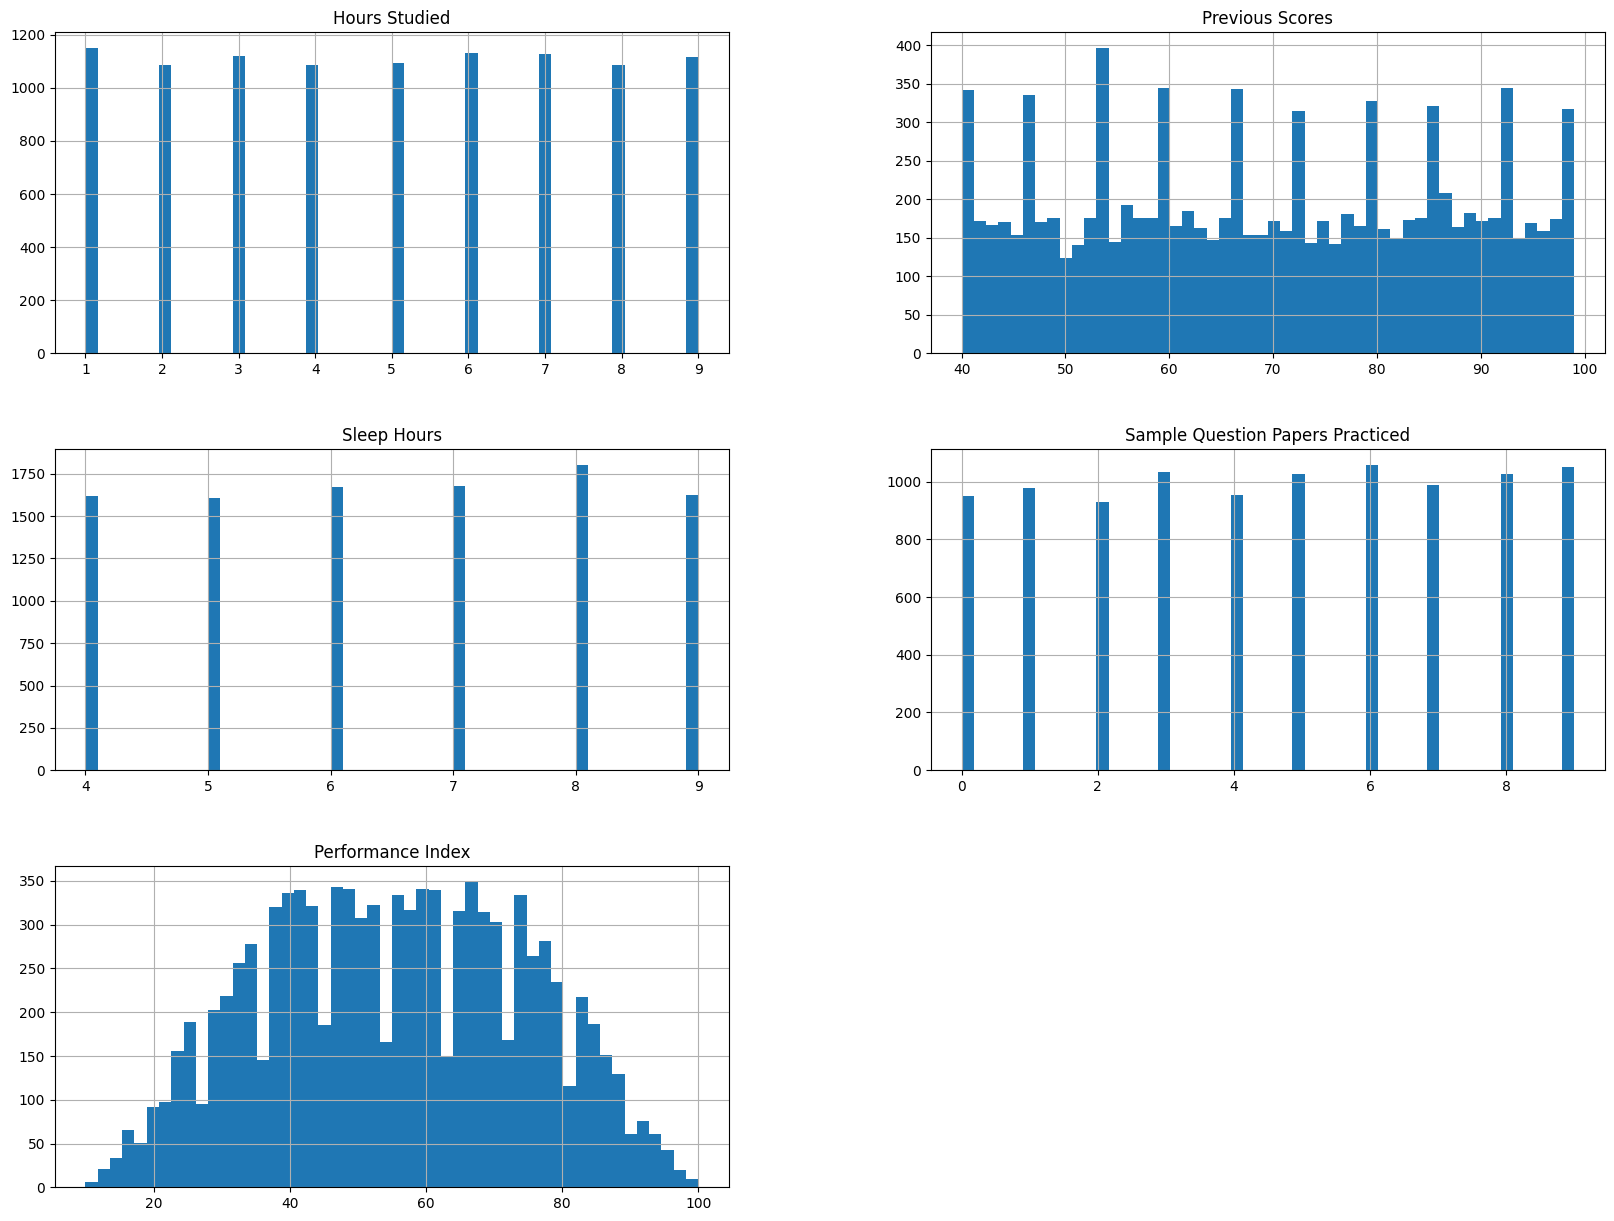

In [9]:
import matplotlib.pyplot as plt
student.hist(bins=50, figsize=(20,15))
plt.show()

From the Histograms it appears that Performance Index has distribution similar to a Normal Distribution. Whereas Hours Studied, Sleep Hours & Sample Question Papers Praciced allign close to a uniform distribution.

Previous Scores also has a distribution similar to uniform with some periodic spikes in between. a

Furthermore, the feature Extracurricular Activities has Yes or No characters which require special treatment to be ordinally encoded.

Also, there are no null values to worry about in this dataset.

In [8]:
corr_matrix = student.corr(numeric_only=True)
corr_matrix["Performance Index"].sort_values(ascending=False)

,Performance Index
Performance Index,1.000000
Previous Scores,0.915189
Hours Studied,0.373730
Sleep Hours,0.048106
Sample Question Papers Practiced,0.043268


Based on the Correlation Coefficient Table, there is a strong positive correlation of Performance Index with Previous Scores and Hours Studied. Weak Coreelation between Sleep Hours & Sample  Question Papers Practiced

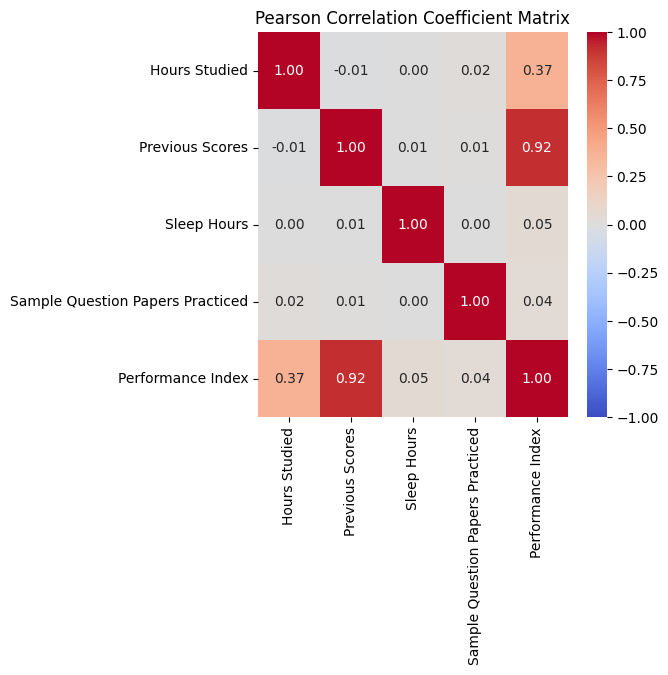

In [10]:
# Drop non-numerical columns for correlation analysis
numerical_data = student.drop(['Extracurricular Activities'], axis=1)

# Compute the Pearson Correlation Coefficient matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

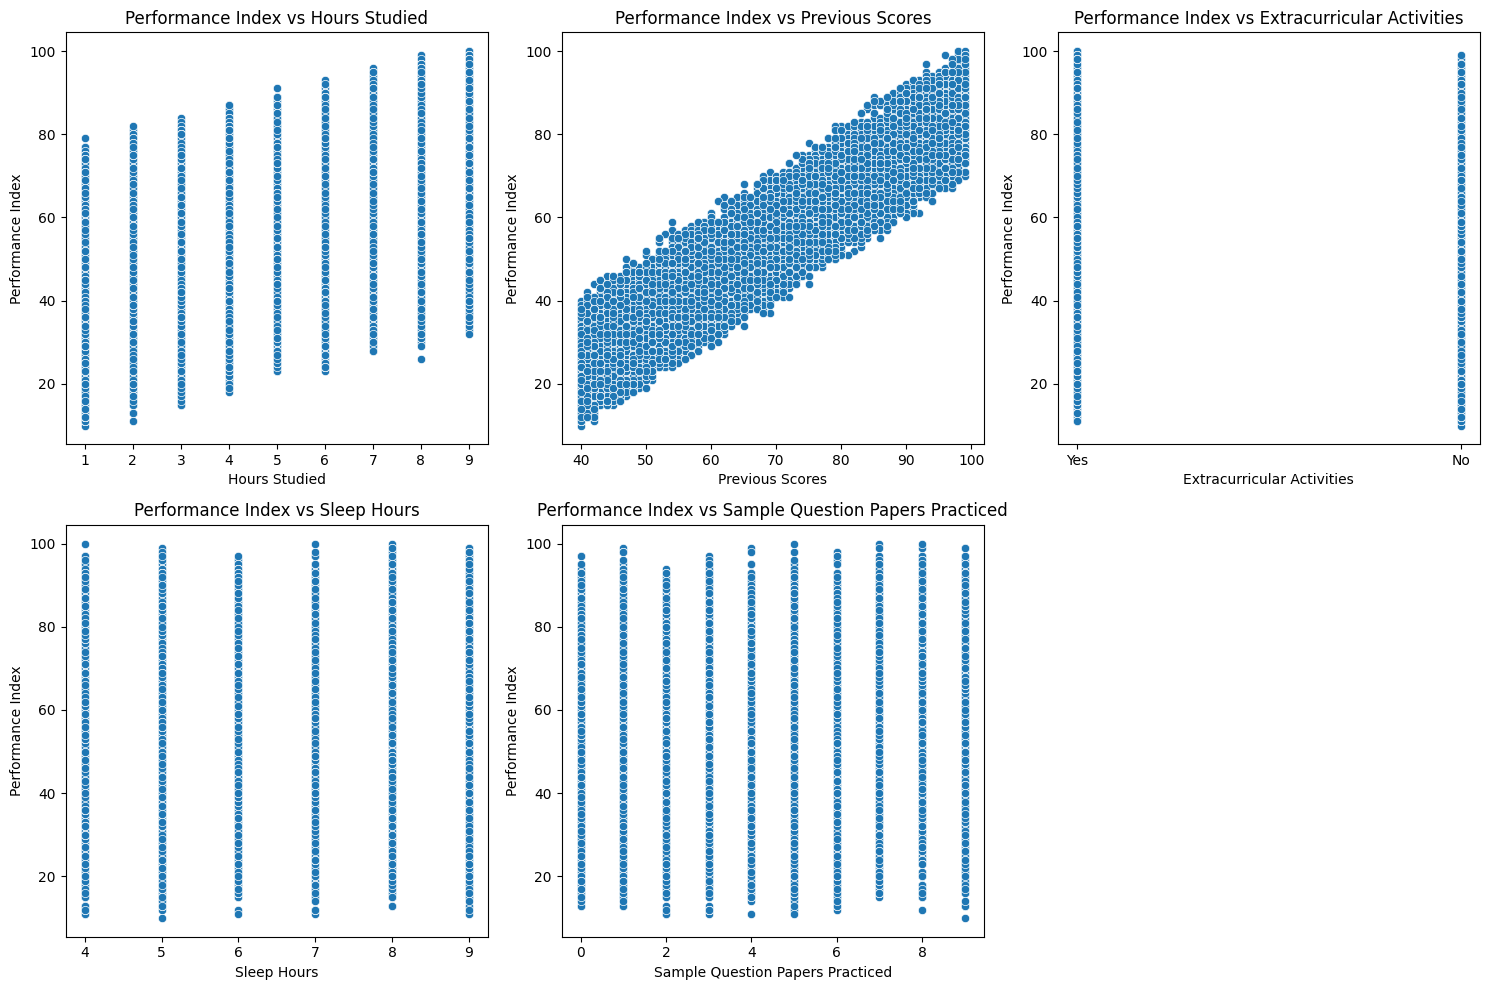

In [6]:

# List of variables to compare with 'Performance Index'
variables = student.columns[student.columns != 'Performance Index']  # Exclude 'Performance Index' itself
num_vars = len(variables)

# Set up subplots: 3 plots per row
rows = (num_vars + 2) // 3  # Calculate the number of rows needed (3 plots per row)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size for better readability

# Flatten axes for easy iteration if multiple rows
axes = axes.flatten()

# Create scatter plots for each variable
for i, var in enumerate(variables):
    sns.scatterplot(data=student, x=var, y='Performance Index', ax=axes[i])
    axes[i].set_title(f'Performance Index vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Performance Index')

# Remove any empty subplots
for i in range(num_vars, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Scatter Plot Summary:

Previous Scores show a strong positive linear relationship with the Performance Index, indicating that students with higher previous scores tend to perform better.

Hours Studied, Sleep Hours, and Sample Question Papers Practiced do not show any clear relationship with the Performance Index; the points are scattered.

Extracurricular Activities (Yes/No) don't seem to affect the Performance Index, as both categories show a wide range of performance

# D. Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. [5 points]

In [12]:
# Necessary imports for data preprocessing pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop the target variable 'Performance Index' from the dataset
student_X = student.drop('Performance Index', axis=1)
y = student['Performance Index']

# Select numerical and categorical columns
numerical_cols = student_X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = student_X.select_dtypes(include=['object']).columns

# Define the preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define the preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

In [13]:
# Apply preprocessing to the dataset
X = preprocessor.fit_transform(student_X)

# Display the processed dataset
print(X)
print(y)

[[ 0.77518771  1.70417565  1.45620461 -1.24975394  0.          1.        ]
 [-0.38348058  0.72391268 -1.49229423 -0.90098215  1.          0.        ]
 [ 1.16141048 -1.06362569  0.27680507 -0.90098215  0.          1.        ]
 ...
 [ 0.38896495  0.7815752   0.86650484  0.1453332   0.          1.        ]
 [ 1.54763324  1.5888506   0.27680507 -1.59852572  0.          1.        ]
 [ 0.77518771  0.26261245  0.86650484 -1.24975394  1.          0.        ]]
0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (7500, 6), X_test: (2500, 6), y_train: (7500,), y_test: (2500,)


In [15]:
# Calculate means of training and test data for features (X)
X_train_mean = X_train.mean()
X_test_mean = X_test.mean()

# Calculate means of training and test data for target (y)
y_train_mean = y_train.mean()
y_test_mean = y_test.mean()

# Display the means
print("Mean of X_train:")
print(X_train_mean)
print("\nMean of X_test:")
print(X_test_mean)

print("\nMean of y_train:")
print(y_train_mean)
print("\nMean of y_test:")
print(y_test_mean)


Mean of X_train:
0.17106314940936532

Mean of X_test:
0.1534772184385708

Mean of y_train:
55.4184

Mean of y_test:
54.644


As it may be seen that the means of the Test and Training set are quite similar which means that our test set is indeed representative of the entire data set.

#E. Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]


In [18]:
# Linear Regression using the Normal Equation (Closed-form solution)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 3-fold cross-validation
linear_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
linear_rmse_scores = np.sqrt(-linear_scores)

# Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the results for the closed-form solution
print("Closed-form solution (Normal Equation) RMSE scores:")

display_scores(linear_rmse_scores)


Coefficients: [ 7.39756068e+00  1.76215966e+01  8.15997202e-01  5.38068285e-01
 -1.00506769e+14 -1.00506769e+14]
Intercept: 100506768677218.28
Closed-form solution (Normal Equation) RMSE scores:
Scores: [2.08982091 2.01052078 2.04910849]
Mean: 2.0498167268300835
Standard deviation: 0.03237801641595578


In [16]:
# Make predictions on the training set
y_train_pred = lin_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred = lin_reg.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.796875
1    20.0  22.546875
2    46.0  47.875000
3    28.0  31.281250
4    41.0  43.078125


In [30]:
from sklearn.linear_model import SGDRegressor

# Perform 3-fold cross-validation for the SGD model
sgd_reg = SGDRegressor(max_iter=1000, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-04, random_state=42)

sgd_reg.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = sgd_reg.coef_
intercept = sgd_reg.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform cross-validation and calculate RMSE scores
sgd_scores = cross_val_score(sgd_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
sgd_rmse_scores = np.sqrt(-sgd_scores)

# Display the RMSE scores for SGD
print("SGD Regression with 3-Fold Cross-Validation RMSE scores:")
display_scores(sgd_rmse_scores)


Coefficients: [ 7.3923393  17.62585508  0.81260436  0.54153867 18.12565574 18.70482722]
Intercept: [36.83048296]
SGD Regression with 3-Fold Cross-Validation RMSE scores:
Scores: [2.08974803 2.01040433 2.04934574]
Mean: 2.04983270029508
Standard deviation: 0.03239376179493754


In [18]:
# Make predictions on the training set
y_train_pred = sgd_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred = sgd_reg.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.801011
1    20.0  22.503749
2    46.0  47.922665
3    28.0  31.311385
4    41.0  43.088909


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

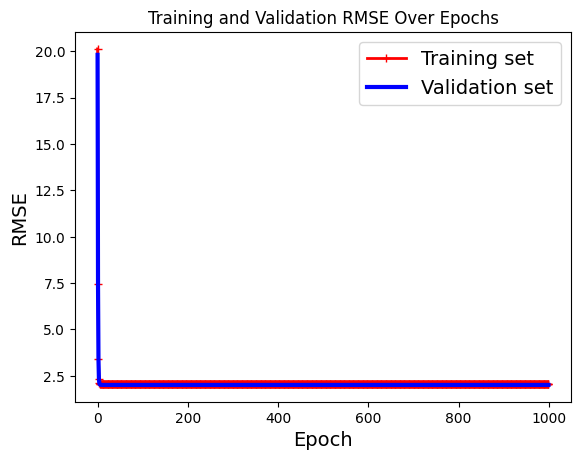

In [20]:
from sklearn.metrics import mean_squared_error

# Initialize the SGDRegressor
sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-04, random_state=42)

# Track training and validation errors over iterations (epochs)
train_errors, val_errors = [], []
n_epochs = 1000

for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)
    y_train_predict = sgd_reg.predict(X_train)
    y_val_predict = sgd_reg.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

# Plot training and validation loss
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE Over Epochs")
plt.show()


The plot above shows the training and validation RMSE descrease sharply at the start and rapidly approach a stable value below 2.5 after just a few epochs.

Stabalization: This means that the models quickly learned the underlying patterns in the data and reached a point after which is does not improve.

Observation on Overfitting: Since training and validation RMSR are almost identical it means that overfitting is not an issue inteh model and it generalizes in good way on unseen data.

Next, I will implement Ridge, Lasso, and Elastic Net regularization with three different penalty values each, and describe the impact of the regularization.

In [22]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Try three different penalty values for Ridge, Lasso, and Elastic Net
alphas = [0.01, 0.1, 1.0]

# Ridge Regression (L2 Regularization)
print("Ridge Regression (L2 Regularization)")
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_scores = cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    print(f"Alpha = {alpha}")
    display_scores(ridge_rmse_scores)

# Lasso Regression (L1 Regularization)
print("\nLasso Regression (L1 Regularization)")
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_scores = cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    print(f"Alpha = {alpha}")
    display_scores(lasso_rmse_scores)

# Elastic Net (Combination of L1 and L2)
print("\nElastic Net (Combination of L1 and L2 Regularization)")
for alpha in alphas:
    elastic_net_reg = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elastic_net_scores = cross_val_score(elastic_net_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)
    print(f"Alpha = {alpha}")
    display_scores(elastic_net_rmse_scores)



Ridge Regression (L2 Regularization)
Alpha = 0.01
Scores: [2.08982085 2.01052097 2.04910824]
Mean: 2.0498166898335235
Standard deviation: 0.032377917163537065
Alpha = 0.1
Scores: [2.0898204  2.01052275 2.04910602]
Mean: 2.049816389231706
Standard deviation: 0.032377024295714145
Alpha = 1.0
Scores: [2.08981902 2.01054367 2.04908707]
Mean: 2.049816586282907
Standard deviation: 0.03236813557503419

Lasso Regression (L1 Regularization)
Alpha = 0.01
Scores: [2.09023043 2.0111082  2.04855127]
Mean: 2.0499632971408683
Standard deviation: 0.03231694431246005
Alpha = 0.1
Scores: [2.11136714 2.03295614 2.06214743]
Mean: 2.0688235675979576
Standard deviation: 0.03235737389804554
Alpha = 1.0
Scores: [2.73411675 2.64469226 2.68875199]
Mean: 2.689186999562794
Standard deviation: 0.03650869009862732

Elastic Net (Combination of L1 and L2 Regularization)
Alpha = 0.01
Scores: [2.09238926 2.01371165 2.05078695]
Mean: 2.052295955134991
Standard deviation: 0.032137715293337143
Alpha = 0.1
Scores: [2.31509

Findings:

Ridge Regression shows consistent performance across different alpha values and is not heavily affected by regularization.

Lasso Regression shows increasing RMSE with higher alpha, suggesting that strong L1 regularization leads to underfitting.

Elastic Net performs similarly to Lasso but with even worse performance at high alpha values due to the combined regularization effect of L1 and L2 penalties.

Now, I will tune learning rate and batch size for SGD and describe the impact of these hyperparameters.

In [23]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

elastic_net_reg = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_reg.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [24]:
# Exploring different learning rates for SGD
learning_rates = [1e-06,1e-05, 1e-04, 1e-03, 1e-02,1e-01]

print("Exploring different learning rates for SGD:")
for lr in learning_rates:
    sgd_reg = SGDRegressor(max_iter=1000, tol=None,warm_start=True, penalty=None, learning_rate="constant", eta0=lr, random_state=42)
    sgd_scores = cross_val_score(sgd_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3)
    sgd_rmse_scores = np.sqrt(-sgd_scores)
    print(f"Learning rate = {lr}")
    display_scores(sgd_rmse_scores)



Exploring different learning rates for SGD:
Learning rate = 1e-06
Scores: [2.09443731 2.01423994 2.05465712]
Mean: 2.054444790653112
Standard deviation: 0.03274078216628738
Learning rate = 1e-05
Scores: [2.08981954 2.01051629 2.0491187 ]
Mean: 2.0498181764626935
Standard deviation: 0.032379193511957796
Learning rate = 0.0001
Scores: [2.08974803 2.01040433 2.04934574]
Mean: 2.04983270029508
Standard deviation: 0.03239376179493754
Learning rate = 0.001
Scores: [2.09115084 2.01583442 2.05538135]
Mean: 2.054122204541034
Standard deviation: 0.030760686589874433
Learning rate = 0.01
Scores: [2.11103549 2.03504723 2.06903507]
Mean: 2.071705927104811
Standard deviation: 0.031079510647575647
Learning rate = 0.1
Scores: [2.34195803 2.31886001 2.21855891]
Mean: 2.293125648822952
Standard deviation: 0.053563223227634474


Overall Summary:

Smaller Learning Rates (1e-06, 1e-05, 1e-04) result in stable but slow learning. The mean RMSE is relatively low, but the model is updating weights in very small steps, making it take longer to converge.

Moderate Learning Rate (0.001) results in slightly worse performance compared to smaller learning rates, with a slight increase in RMSE, indicating that while it allows faster convergence, it may not be optimal.

Larger Learning Rates (0.01, 0.1) cause overshooting and oscillations, leading to worse performance. The model fails to converge optimally, and both the mean RMSE and standard deviation increase significantly.


Simulating mini-batch SGD with smaller chunks of data:


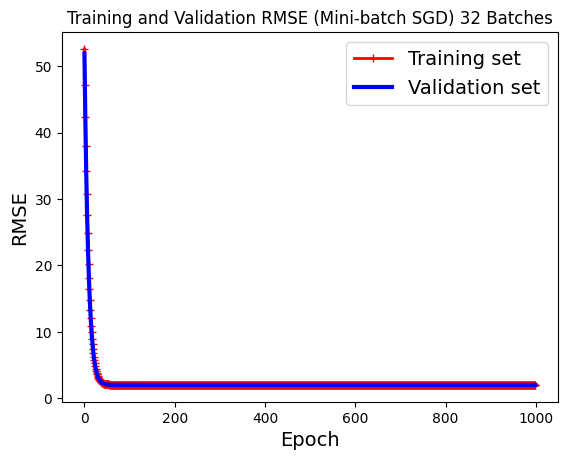

In [25]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 32 # Split into batches
batch_size = X_train.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-05, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch.predict(X_train)
    y_val_predict_batch = sgd_reg_batch.predict(X_test)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 32 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


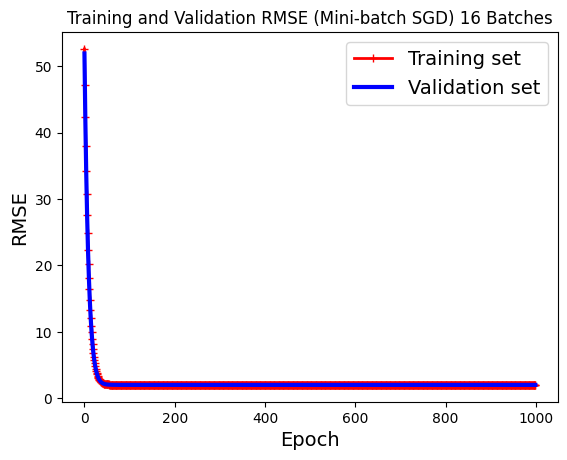

In [26]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 16 # Split into batches
batch_size = X_train.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-05, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch.predict(X_train)
    y_val_predict_batch = sgd_reg_batch.predict(X_test)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 16 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


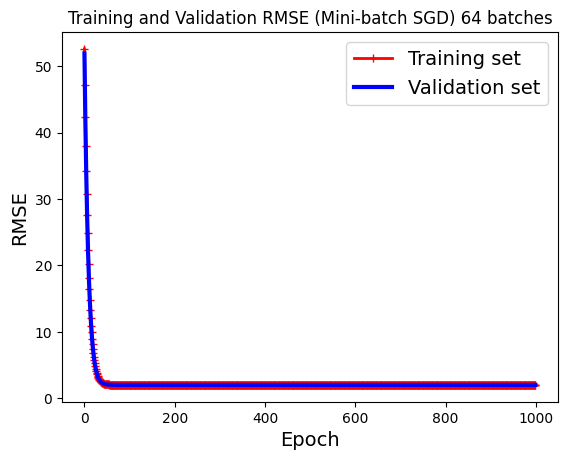

In [28]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 64 # Split into batches
batch_size = X_train.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-05, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch.predict(X_train)
    y_val_predict_batch = sgd_reg_batch.predict(X_test)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 64 batches")
plt.show()


Mini-batch SGD:

The mini-batch approach simulates smaller batch sizes by splitting the training data into 16,32 and 64 batches.
We will prefer to use 32 batches for a blance between speed, memory efficiency and generalization

The training and validation RMSE are plotted above. Mini-batch training helps smooth the training process by updating weights more frequently compared to full-batch updates. Furthremore, in the the mini-batch the training and validation RMSE gradually decreases as compared to SGD Full batch.



In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    # RMSE for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for training set
    r2_train = r2_score(y_train, y_train_pred)

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Training R-squared: {r2_train}, Test R-squared: {r2_test}")

# Evaluate each model

# 1. Linear Regression (Normal Equation)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
evaluate_model("Linear Regression (Normal Equation)", y_train, y_train_pred, y_test, y_test_pred)

# 2. Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)
evaluate_model("Linear Regression (SGD)", y_train, y_train_pred_sgd, y_test, y_test_pred_sgd)

# 3. Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

# 4. Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
evaluate_model("Lasso Regression", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

# 5. Elastic Net Regression
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)
evaluate_model("Elastic Net Regression", y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)

# 6. SGD with Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)
evaluate_model("SGD with Mini-Batch", y_train, y_train_pred_sgd_batch, y_test, y_test_pred_sgd_batch)





Model: Linear Regression (Normal Equation)
Training RMSE: 2.0483791944409977, Test RMSE: 2.010380677570793
Training R-squared: 0.9886337582579358, Test R-squared: 0.9890304143021095

Model: Linear Regression (SGD)
Training RMSE: 2.047874595032757, Test RMSE: 2.0081613761512034
Training R-squared: 0.9886393575067868, Test R-squared: 0.9890546200458333

Model: Ridge Regression
Training RMSE: 2.0478584280619727, Test RMSE: 2.008121201256837
Training R-squared: 0.9886395368795382, Test R-squared: 0.9890550579838299

Model: Lasso Regression
Training RMSE: 2.0480537066734423, Test RMSE: 2.0098306297739303
Training R-squared: 0.988637370166052, Test R-squared: 0.9890364161216435

Model: Elastic Net Regression
Training RMSE: 2.0504536507648674, Test RMSE: 2.017528522716366
Training R-squared: 0.9886107247184459, Test R-squared: 0.9889522715991456

Model: SGD with Mini-Batch
Training RMSE: 2.047861115933147, Test RMSE: 2.008210403781605
Training R-squared: 0.9886395070576707, Test R-squared: 0


Description of Models:

In this project, we employed Linear regression (Normal Equation) to model relationship between the features and the target. Normal Equation (Closed-form solution) achieves a mean Training RMSE of 2.049.

To optimize the model, we used Stochastic Gradient Descent (SGD), which updates the model parameters incrementally based on mini-batches of data. This approach allowed the model to converge efficiently, even with large datasets, by performing frequent weight updates. The Training RMSE of this model was 2.048.

Regularization Techniques:

Ridge Regression shows consistent performance across different alpha values and is not heavily affected by regularization.

Lasso Regression shows increasing RMSE with higher alpha, suggesting that strong L1 regularization leads to underfitting.

Elastic Net performs similarly to Lasso but with even worse performance at high alpha values due to the combined regularization effect of L1 and L2 penalties.

Hyperparameters and Model Behavior:

We experimented with various learning rates, ranging from 1e-6 to 1e-1, to control the speed of convergence. The optimal learning rate (1e-5 or 1e-4) balanced rapid convergence and model stability. Mini-batch size was set to 32, dividing the data into smaller chunks. This allowed for convergence as compared to full-batch training.

The model was trained over 1000 epochs, and we observed that RMSE on both the training and validation sets dropped significantly and stabilized after the first few epochs, indicating that the model was learning effectively


#F. Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data. [10 points]

In [32]:
from sklearn.preprocessing import PolynomialFeatures


# Polynomial Feature Transformation (degree 2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [33]:
# Polynomial Regression using the Normal Equation (Closed-form solution)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Polinomial regression model
poly_reg = LinearRegression()

# Train the model
poly_reg.fit(X_train_poly, y_train)

# Get the coefficients and intercept
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform 3-fold cross-validation
linear_scores = cross_val_score(poly_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
linear_rmse_scores = np.sqrt(-linear_scores)

# Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the results for the closed-form solution
print("Closed-form solution (Normal Equation) RMSE scores:")
display_scores(linear_rmse_scores)

Coefficients: [-1.52076872e+11 -2.14847588e+12  2.36465869e+13 -1.38308010e+13
  2.19427508e+13  2.14294879e+12 -5.50729676e+12  2.45084792e-02
  3.27244314e-03  1.09890965e-02  6.71126097e-03  2.14847588e+12
  2.14847588e+12 -3.46488641e-02  1.76085795e-03 -1.00460583e-02
 -2.36465869e+13 -2.36465869e+13  5.39093018e-02  2.98767090e-02
  1.38308010e+13  1.38308010e+13 -2.07519531e-03 -2.19427508e+13
 -2.19427508e+13 -8.05565656e+11  0.00000000e+00  6.84467990e+12]
Intercept: -1185306265664.0356
Closed-form solution (Normal Equation) RMSE scores:
Scores: [2.09224612 2.01768128 2.04724358]
Mean: 2.0523903249281865
Standard deviation: 0.030657741133719208


In [34]:
# Make predictions on the training set
y_train_pred = poly_reg.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred = poly_reg.predict(X_test_poly)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.687012
1    20.0  22.565918
2    46.0  47.874512
3    28.0  31.222168
4    41.0  43.044434


In [35]:
# Perform 3-fold cross-validation for the SGD Polynomial model
sgd_reg_poly = SGDRegressor(max_iter=1000, tol=1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-4, random_state=42)

sgd_reg_poly.fit(X_train_poly, y_train)

# Get the coefficients and intercept
coefficients = sgd_reg_poly.coef_
intercept = sgd_reg_poly.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Perform cross-validation and calculate RMSE scores
sgd_scores = cross_val_score(sgd_reg_poly, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
sgd_rmse_scores = np.sqrt(-sgd_scores)

# Display the RMSE scores for SGD
print("SGD Regression with 3-Fold Cross-Validation RMSE scores:")
display_scores(sgd_rmse_scores)

Coefficients: [ 1.83834995e+01  4.92575296e+00  1.17513023e+01  5.32605915e-01
  3.61672070e-01  9.04328773e+00  9.34021176e+00  3.00427228e-02
  6.13505645e-03 -2.50055553e-03  4.78745053e-03  2.42522754e+00
  2.50052542e+00 -3.07324205e-02  1.09008418e-02 -8.43362649e-03
  5.87651431e+00  5.87478797e+00  6.71167613e-02  3.70127343e-02
  2.54515623e-01  2.78090292e-01  2.74532989e-03  1.82263776e-01
  1.79408293e-01  9.04328773e+00  0.00000000e+00  9.34021176e+00]
Intercept: [18.38349949]
SGD Regression with 3-Fold Cross-Validation RMSE scores:
Scores: [2.09343683 2.01581118 2.0486178 ]
Mean: 2.0526219353839443
Standard deviation: 0.031816771253978235


In [44]:
# Make predictions on the training set
y_train_pred = sgd_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred = sgd_reg_poly.predict(X_test_poly)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.650690
1    20.0  22.046656
2    46.0  47.759225
3    28.0  30.926552
4    41.0  42.879436


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

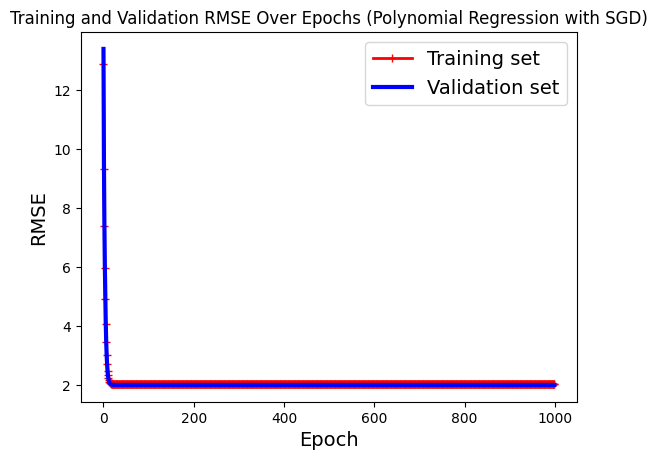

In [36]:
sgd_reg_poly = SGDRegressor(max_iter=1, tol= 1e-3, warm_start=True, penalty=None, learning_rate="constant", eta0=1e-4, random_state=42)

train_errors, val_errors = [], []
n_epochs = 1000  # Number of iterations/epochs

for epoch in range(n_epochs):
    sgd_reg_poly.fit(X_train_poly, y_train)  # Fit the model to the training set
    y_train_predict = sgd_reg_poly.predict(X_train_poly)  # Predict on the training set
    y_val_predict = sgd_reg_poly.predict(X_test_poly)  # Predict on the test set

    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_test, y_val_predict))

plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE Over Epochs (Polynomial Regression with SGD)")
plt.show()

The plot above shows the training and validation RMSE descrease sharply at the start and rapidly approach a stable value below 2.5 after just a few epochs.

Stabalization: This means that the models quickly learned the underlying patterns in the data and reached a point after which is does not improve.

Observation on Overfitting: Since training and validation RMSR are almost identical it means that overfitting is not an issue in the model and model can generalizes on unseen data in good way.

Next, I will implement Ridge, Lasso, and Elastic Net regularization with three different penalty values each, and describe the impact of the regularization.

In [37]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Try three different penalty values for Ridge, Lasso, and Elastic Net
alphas = [0.01, 0.1, 1.0]

# Ridge Regression (L2 Regularization)
print("Ridge Regression (L2 Regularization)")
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_scores = cross_val_score(ridge_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    print(f"Alpha = {alpha}")
    display_scores(ridge_rmse_scores)

# Lasso Regression (L1 Regularization)
print("\nLasso Regression (L1 Regularization)")
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_scores = cross_val_score(lasso_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    print(f"Alpha = {alpha}")
    display_scores(lasso_rmse_scores)

# Elastic Net (Combination of L1 and L2)
print("\nElastic Net (Combination of L1 and L2 Regularization)")
for alpha in alphas:
    elastic_net_reg = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elastic_net_scores = cross_val_score(elastic_net_reg, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)
    print(f"Alpha = {alpha}")
    display_scores(elastic_net_rmse_scores)


ridge_reg_poly = Ridge(alpha=0.01)
ridge_reg_poly.fit(X_train_poly, y_train)

lasso_reg_poly = Lasso(alpha=0.01)
lasso_reg_poly.fit(X_train_poly, y_train)

elastic_net_reg_poly = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_reg_poly.fit(X_train_poly, y_train)

Ridge Regression (L2 Regularization)
Alpha = 0.01
Scores: [2.09233081 2.01609972 2.04901133]
Mean: 2.0524806195953498
Standard deviation: 0.031217746565674113
Alpha = 0.1
Scores: [2.09233151 2.01609995 2.04901033]
Mean: 2.0524805952504894
Standard deviation: 0.031217997631121767
Alpha = 1.0
Scores: [2.09234    2.01610355 2.04900181]
Mean: 2.0524817880705712
Standard deviation: 0.03122052256309793

Lasso Regression (L1 Regularization)
Alpha = 0.01
Scores: [2.09144685 2.0145028  2.04842772]
Mean: 2.0514591242775793
Standard deviation: 0.03148532482408624
Alpha = 0.1
Scores: [2.11136715 2.03295613 2.06214743]
Mean: 2.068823567303248
Standard deviation: 0.0323573835368099
Alpha = 1.0
Scores: [2.73411675 2.64469226 2.68875199]
Mean: 2.689186999562794
Standard deviation: 0.03650869009862732

Elastic Net (Combination of L1 and L2 Regularization)
Alpha = 0.01
Scores: [2.09320537 2.01677831 2.04965773]
Mean: 2.053213803838928
Standard deviation: 0.031302374371830546
Alpha = 0.1
Scores: [2.21344

ElasticNet(alpha=0.01)

Regularization Results:
1. Ridge Regression (L2 Regularization):

Alpha = 0.01: Mean RMSE = 2.052         
Alpha = 0.1: Mean RMSE = 2.052          
Alpha = 1.0: Mean RMSE = 2.052

Ridge regularization slightly shrinks the coefficients, but the results are fairly stable across the different penalty values (alpha), suggesting that regularization does not significantly improve the model's performance in this case.

2. Lasso Regression (L1 Regularization):
Alpha = 0.01: Mean RMSE = 2.051
Alpha = 0.1: Mean RMSE = 2.068
Alpha = 1.0: Mean RMSE = 2.689

Lasso starts with a similar performance for smaller alpha values, but as alpha increases, Lasso aggressively shrinks the coefficients to zero, which can lead to underfitting, particularly when alpha is too high.

3. Elastic Net (Combination of L1 and L2):
Alpha = 0.01: Mean RMSE = 2.053
Alpha = 0.1: Mean RMSE = 2.172
Alpha = 1.0: Mean RMSE = 5.878

Elastic Net provides a balance between Ridge and Lasso. It performs similarly to Ridge at low values of alpha, but when alpha increases, the model starts to perform worse, likely due to a combination of shrinking and feature selection.

Findings:

Ridge is the most stable regularization method across different penalty values.

Lasso aggressively shrinks coefficients to zero, which can lead to underfitting when alpha is too high.

Elastic Net balances the effects of Ridge and Lasso, but high penalty values result in a significant increase in error.

Now, I will tune learning rate and batch size for SGD and describe the impact of these hyperparameters.

In [38]:
# Exploring different learning rates for SGD
learning_rates = [1e-06,1e-05, 1e-04, 1e-03, 1e-02,1e-01]

print("Exploring different learning rates for SGD:")
for lr in learning_rates:
    sgd_reg_poly_lr = SGDRegressor(max_iter=1000, tol=None,warm_start=True, penalty=None, learning_rate="constant", eta0=lr, random_state=42)
    sgd_scores = cross_val_score(sgd_reg_poly_lr, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=3)
    sgd_rmse_scores = np.sqrt(-sgd_scores)
    print(f"Learning rate = {lr}")
    display_scores(sgd_rmse_scores)

Exploring different learning rates for SGD:
Learning rate = 1e-06
Scores: [3.82126382 3.57621911 3.60653325]
Mean: 3.6680053949632128
Standard deviation: 0.10907442493779006
Learning rate = 1e-05
Scores: [2.09231812 2.01605781 2.04906157]
Mean: 2.0524791677246275
Standard deviation: 0.03122679354841284
Learning rate = 0.0001
Scores: [2.09275684 2.01636234 2.05079636]
Mean: 2.0533051799434245
Standard deviation: 0.03123833939148217
Learning rate = 0.001
Scores: [2.1048935  2.02296636 2.05961084]
Mean: 2.0624902330703843
Standard deviation: 0.03350853036678006
Learning rate = 0.01
Scores: [2.19429868 2.11830934 2.13871629]
Mean: 2.1504414370832134
Standard deviation: 0.03211130630949606
Learning rate = 0.1
Scores: [1.20309125e+12 1.89998548e+12 1.06630349e+12]
Mean: 1389793407466.9067
Standard deviation: 365056789463.08765


Overall Summary:

Best Performance: The learning rates between 1e-05 and 1e-3 provide the best balance between low error and consistent performance.

Too Small Learning Rate: A learning rate of 1e-06 results in slow learning and poor performance.

Too Large Learning Rate: A learning rate of 0.1 leads to divergence and massive errors, making the model unusable.


Simulating mini-batch SGD with smaller chunks of data:


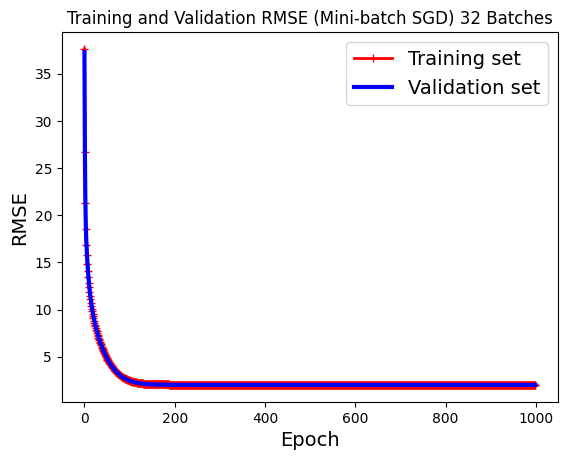

In [41]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 32 # Split into batches
batch_size = X_train_poly.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch_poly = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-05, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_poly[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch_poly.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch_poly.predict(X_train_poly)
    y_val_predict_batch = sgd_reg_batch_poly.predict(X_test_poly)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 32 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


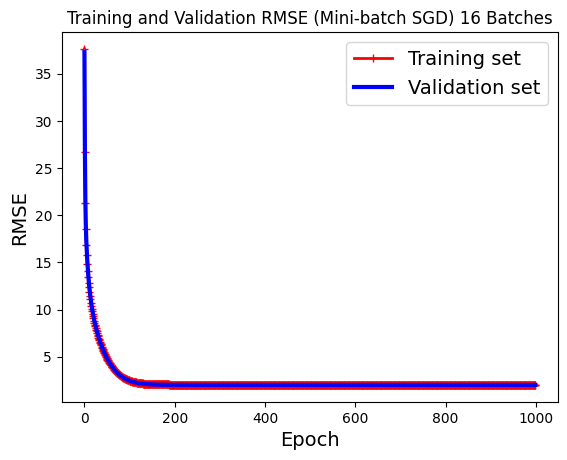

In [40]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 16 # Split into batches
batch_size = X_train_poly.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch_poly = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-05, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_poly[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch_poly.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch_poly.predict(X_train_poly)
    y_val_predict_batch = sgd_reg_batch_poly.predict(X_test_poly)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 16 Batches")
plt.show()



Simulating mini-batch SGD with smaller chunks of data:


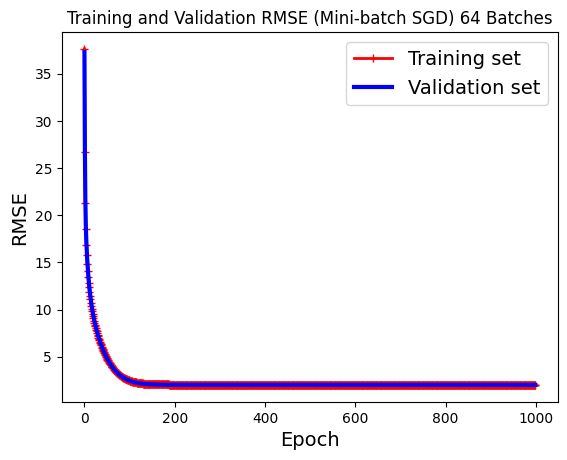

In [42]:
# Simulating mini-batch SGD (batch size approximation)
print("\nSimulating mini-batch SGD with smaller chunks of data:")

# Use partial_fit for simulating batch sizes
n_batches = 64 # Split into batches
batch_size = X_train_poly.shape[0] // n_batches
n_epochs = 1000

# Initialize the model
sgd_reg_batch_poly = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty='l2', learning_rate="constant", eta0=1e-05, random_state=42)

train_errors_batch, val_errors_batch = [], []

# Simulate the training with mini-batches over epochs
for epoch in range(n_epochs):
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_train_poly[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        sgd_reg_batch_poly.partial_fit(X_batch, y_batch)

    y_train_predict_batch = sgd_reg_batch_poly.predict(X_train_poly)
    y_val_predict_batch = sgd_reg_batch_poly.predict(X_test_poly)
    train_errors_batch.append(mean_squared_error(y_train, y_train_predict_batch))
    val_errors_batch.append(mean_squared_error(y_test, y_val_predict_batch))

# Plotting the training and validation loss for mini-batch SGD
plt.plot(np.sqrt(train_errors_batch), "r-+", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors_batch), "b-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Training and Validation RMSE (Mini-batch SGD) 64 Batches")
plt.show()


Mini-batch SGD:

The mini-batch approach simulates smaller batch sizes by splitting the training data into 16,32 and 64 batches.
We will prefer to use 32 batches for a blance between speed, memory efficiency and generalization.

The training and validation RMSE are plotted above. Mini-batch training helps smooth the training process by updating weights more frequently compared to full-batch updates. Furthermore, in the the mini-batch the training and validation RMSE decrease at gradual rate as compared to SGD Full batch where the decrerase in RSME was sudden.



In [43]:
#Model Descriptions

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    # RMSE for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for training set
    r2_train = r2_score(y_train, y_train_pred)

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Training R-squared: {r2_train}, Test R-squared: {r2_test}")

# Evaluate each model


# 7. Polynomial Regression (Normal Equation)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
evaluate_model("Polynomial Regression (Normal Equation)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# 8. Polynomial Regression (SGD)
y_train_pred_sgd_poly = sgd_reg_poly.predict(X_train_poly)
y_test_pred_sgd_poly = sgd_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Regression (SGD)", y_train, y_train_pred_sgd_poly, y_test, y_test_pred_sgd_poly)

# 9. Polynomial Ridge Regression
y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Ridge Regression", y_train, y_train_pred_ridge_poly, y_test, y_test_pred_ridge_poly)

# 10. Polynomial Lasso Regression
y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Lasso Regression", y_train, y_train_pred_lasso_poly, y_test, y_test_pred_lasso_poly)

# 11. Polynomial Elastic Net Regression
y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Elastic Net Regression", y_train, y_train_pred_elastic_net_poly, y_test, y_test_pred_elastic_net_poly)

# 12. Polynomial SGD with Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)
evaluate_model("Polynomial SGD with Mini-Batch", y_train, y_train_pred_sgd_batch_poly, y_test, y_test_pred_sgd_batch_poly)



Model: Polynomial Regression (Normal Equation)
Training RMSE: 2.046239659779032, Test RMSE: 2.009329826511657
Training R-squared: 0.9886574899653403, Test R-squared: 0.9890418791834819

Model: Polynomial Regression (SGD)
Training RMSE: 2.046476355223582, Test RMSE: 2.01089478545024
Training R-squared: 0.9886548657607732, Test R-squared: 0.9890248031543342

Model: Polynomial Ridge Regression
Training RMSE: 2.046162047001519, Test RMSE: 2.0099961349667437
Training R-squared: 0.9886583503797188, Test R-squared: 0.9890346103925954

Model: Polynomial Lasso Regression
Training RMSE: 2.0466020253938297, Test RMSE: 2.0113147431704554
Training R-squared: 0.9886534723523188, Test R-squared: 0.9890202185286575

Model: Polynomial Elastic Net Regression
Training RMSE: 2.0475404015988556, Test RMSE: 2.0161453334865267
Training R-squared: 0.9886430650993775, Test R-squared: 0.9889674147413741

Model: Polynomial SGD with Mini-Batch
Training RMSE: 2.046172359376587, Test RMSE: 2.0101921381487804
Train

Description of Models:

Polynomial Regression (Normal Equation):

In this model, we applied Polynomial Regression using the Normal Equation to capture non-linear relationships between the features and the target. By generating polynomial features (e.g., degree-2 polynomials), we allow the model to learn more complex patterns that cannot be captured by simple linear regression. The Normal Equation is a closed-form solution that computes the optimal coefficients without needing an iterative optimization algorithm like gradient descent.
The mean Training RSME is 2.046.

Model: Polynomial Regression with SGD:
This model applies polynomial regression to capture non-linear relationships between the features and the target. By transforming the input features into polynomial terms (e.g., degree-2 polynomials), the model becomes capable of capturing more complex patterns that are not possible with standard linear regression.The mean Training RSME is 2.046.

To optimize the model, we used Stochastic Gradient Descent (SGD), which updates the model parameters. Our initial experiment This approach allowed the model to  efficiently, even with large datasets, by performing frequent weight updates.


Regularization Techniques:

To prevent overfitting and improve generalization, we implemented three types of regularization:
Ridge Regression (L2 Regularization): This penalizes large coefficients and helps reduce model complexity by shrinking the parameters. It was particularly useful in cases where multicollinearity existed between features.
Lasso Regression (L1 Regularization): Lasso not only shrinks the coefficients but can drive some of them to exactly zero, effectively performing feature selection.
Elastic Net: This combines both L1 and L2 regularization, balancing the advantages of Ridge and Lasso. It is useful when we expect some features to be irrelevant (sparse solutions) while also controlling for large coefficients.

Ridge is the most stable regularization method across different penalty values.

Lasso aggressively shrinks coefficients to zero, which can lead to underfitting when alpha is too high.

Elastic Net balances the effects of Ridge and Lasso, but high penalty values result in a significant increase in error.

Hyperparameters and Model Behavior:

We experimented with various learning rates, ranging from 1e-5 to 1e-1 to control the speed of convergence. The learning rates between 1e-05 and 1e-3 provide the best balance between low error and consistent performance. .
Mini-batch size was set to 32, dividing the data into smaller chunks. This allowed for a smooth convergence as compared to full-batch training where the convergence was sudden.

The model was trained over 1000 epochs, and we observed that RMSE on both the training and validation sets dropped significantly and stabilized after the first few epochs, indicating that the model was learning effectively.

#G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]

1. Prediction on Test Data (5 points):

Linear Regression

In [60]:
#Prediction on Linear Regression (Normal Equation)

# Make predictions on the training set
y_train_pred = lin_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred = lin_reg.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred[:5]
})

print(comparison_df)


   Actual  Predicted
0    51.0  54.796875
1    20.0  22.546875
2    46.0  47.875000
3    28.0  31.281250
4    41.0  43.078125


In [75]:
# Prediction on Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_sgd = sgd_reg.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.739631
1    20.0  22.593922
2    46.0  47.903842
3    28.0  31.299026
4    41.0  43.026912


In [91]:
#Prediction on Ridge Regression

# Make predictions on the training set
y_train_pred_ridge = ridge_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_ridge = ridge_reg.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_ridge_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_ridge[:5]
})

print("Ridge Regression Predictions:")
print(comparison_ridge_df)

Ridge Regression Predictions:
   Actual  Predicted
0    51.0  54.731880
1    20.0  22.612154
2    46.0  47.908398
3    28.0  31.301075
4    41.0  43.035831


In [67]:
#Prediction on Lasso Regression

# Make predictions on the training set
y_train_pred_lasso = lasso_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_lasso = lasso_reg.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_lasso_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_lasso[:5]
})

print("Lasso Regression Predictions:")
print(comparison_lasso_df)

Lasso Regression Predictions:
   Actual  Predicted
0    51.0  54.752371
1    20.0  22.619946
2    46.0  47.884183
3    28.0  31.282479
4    41.0  43.068237


In [68]:
#Prediction on Elastic Regression

# Make predictions on the training set
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)

# Make predictions on the testing set
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_elastic_net_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_elastic_net[:5]
})

print("Elastic Net Regression Predictions:")
print(comparison_elastic_net_df)

Elastic Net Regression Predictions:
   Actual  Predicted
0    51.0  54.745349
1    20.0  22.780152
2    46.0  47.933651
3    28.0  31.412534
4    41.0  43.113357


In [76]:
#Prediction using SGD Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)

# Make predictions on the testing set
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_sgd_batch_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd_batch[:5]
})

print("SGD with Mini-Batch Predictions:")
print(comparison_sgd_batch_df)

SGD with Mini-Batch Predictions:
   Actual  Predicted
0    51.0  54.733707
1    20.0  22.609286
2    46.0  47.906130
3    28.0  31.299781
4    41.0  43.034814


Polynomial Model

In [77]:
#Predictions from Polynomial Model REgression

# Make predictions on the training set
y_train_pred_poly = poly_reg.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_poly = poly_reg.predict(X_test_poly)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_poly[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.687012
1    20.0  22.565918
2    46.0  47.874512
3    28.0  31.222168
4    41.0  43.044434


In [79]:
# Prediction on Linear Regression (SGD)
y_train_pred_sgd = sgd_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_sgd = sgd_reg_poly.predict(X_test_poly)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd[:5]
})

print(comparison_df)

   Actual  Predicted
0    51.0  54.635912
1    20.0  22.574561
2    46.0  47.842682
3    28.0  31.187575
4    41.0  43.062494


In [83]:
#Prediction from Ridge Regression:

y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_ridge_poly_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_ridge_poly[:5]
})

print("Ridge Regression (Polynomial Features) Predictions:")
print(comparison_ridge_poly_df)

Ridge Regression (Polynomial Features) Predictions:
   Actual  Predicted
0    51.0  54.690931
1    20.0  22.573461
2    46.0  47.895759
3    28.0  31.237321
4    41.0  43.076457


In [84]:
#Prediction from Lasso Regression

y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_lasso_poly_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_lasso_poly[:5]
})

print("Lasso Regression (Polynomial Features) Predictions:")
print(comparison_lasso_poly_df)

Lasso Regression (Polynomial Features) Predictions:
   Actual  Predicted
0    51.0  54.734994
1    20.0  22.581399
2    46.0  47.872915
3    28.0  31.248111
4    41.0  43.079062


In [85]:
#Prediction from Elastic Net Regression

y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_elastic_net_poly_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_elastic_net_poly[:5]
})

print("Elastic Net Regression (Polynomial Features) Predictions:")
print(comparison_elastic_net_poly_df)

Elastic Net Regression (Polynomial Features) Predictions:
   Actual  Predicted
0    51.0  54.712649
1    20.0  22.680790
2    46.0  47.912446
3    28.0  31.330034
4    41.0  43.123790


In [87]:
#Prediction using SGD Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)

# Create a DataFrame to compare actual vs predicted values for the first 5 samples
comparison_sgd_batch_df = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_sgd_batch_poly[:5]
})

print("SGD with Mini-Batch Predictions:")
print(comparison_sgd_batch_df)

SGD with Mini-Batch Predictions:
   Actual  Predicted
0    51.0  54.690611
1    20.0  22.578699
2    46.0  47.887926
3    28.0  31.235672
4    41.0  43.075989


Reporting the Evaluation Metric:

We shall check the model effectiveness based on the lowest RSME Score and Highest R Sqaure Value.

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    # RMSE for training set
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for training set
    r2_train = r2_score(y_train, y_train_pred)

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\nModel: {model_name}")
    print(f"Training RMSE: {rmse_train}, Test RMSE: {rmse_test}")
    print(f"Training R-squared: {r2_train}, Test R-squared: {r2_test}")

# Evaluate each model

# 1. Linear Regression (Normal Equation)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
evaluate_model("Linear Regression (Normal Equation)", y_train, y_train_pred, y_test, y_test_pred)

# 2. Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)
evaluate_model("Linear Regression (SGD)", y_train, y_train_pred_sgd, y_test, y_test_pred_sgd)

# 3. Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

# 4. Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
evaluate_model("Lasso Regression", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

# 5. Elastic Net Regression
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)
evaluate_model("Elastic Net Regression", y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)

# 6. SGD with Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)
evaluate_model("SGD with Mini-Batch", y_train, y_train_pred_sgd_batch, y_test, y_test_pred_sgd_batch)

# 7. Polynomial Regression (Normal Equation)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
evaluate_model("Polynomial Regression (Normal Equation)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# 8. Polynomial Regression (SGD)
y_train_pred_sgd_poly = sgd_reg_poly.predict(X_train_poly)
y_test_pred_sgd_poly = sgd_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Regression (SGD)", y_train, y_train_pred_sgd_poly, y_test, y_test_pred_sgd_poly)

# 9. Polynomial Ridge Regression
y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Ridge Regression", y_train, y_train_pred_ridge_poly, y_test, y_test_pred_ridge_poly)

# 10. Polynomial Lasso Regression
y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Lasso Regression", y_train, y_train_pred_lasso_poly, y_test, y_test_pred_lasso_poly)

# 11. Polynomial Elastic Net Regression
y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Elastic Net Regression", y_train, y_train_pred_elastic_net_poly, y_test, y_test_pred_elastic_net_poly)

# 12. Polynomial SGD with Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)
evaluate_model("Polynomial SGD with Mini-Batch", y_train, y_train_pred_sgd_batch_poly, y_test, y_test_pred_sgd_batch_poly)



Model: Linear Regression (Normal Equation)
Training RMSE: 2.0483791944409977, Test RMSE: 2.010380677570793
Training R-squared: 0.9886337582579358, Test R-squared: 0.9890304143021095

Model: Linear Regression (SGD)
Training RMSE: 2.047874595032757, Test RMSE: 2.0081613761512034
Training R-squared: 0.9886393575067868, Test R-squared: 0.9890546200458333

Model: Ridge Regression
Training RMSE: 2.0478584280619727, Test RMSE: 2.008121201256837
Training R-squared: 0.9886395368795382, Test R-squared: 0.9890550579838299

Model: Lasso Regression
Training RMSE: 2.0480537066734423, Test RMSE: 2.0098306297739303
Training R-squared: 0.988637370166052, Test R-squared: 0.9890364161216435

Model: Elastic Net Regression
Training RMSE: 2.0504536507648674, Test RMSE: 2.017528522716366
Training R-squared: 0.9886107247184459, Test R-squared: 0.9889522715991456

Model: SGD with Mini-Batch
Training RMSE: 2.047861052977518, Test RMSE: 2.008208397283034
Training R-squared: 0.9886395077561624, Test R-squared: 0

In [93]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize variables to track the best models
best_r2_model = None
best_rmse_model = None
best_r2 = -np.inf  # Start with a very low value for R-squared
best_rmse = np.inf  # Start with a very high value for RMSE

# List to store results for comparison
results = []

# Function to compute and display RMSE and R-squared for each model
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    global best_r2, best_rmse, best_r2_model, best_rmse_model

    # RMSE for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R-squared for test set
    r2_test = r2_score(y_test, y_test_pred)

    # Append to results list
    results.append({
        'Model': model_name,
        'RMSE': rmse_test,
        'R-squared': r2_test
    })

    # Check for best R-squared model
    if r2_test > best_r2:
        best_r2 = r2_test
        best_r2_model = model_name

    # Check for lowest RMSE model
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_rmse_model = model_name

    print(f"\nModel: {model_name}")
    print(f"Test RMSE: {rmse_test}, Test R-squared: {r2_test}")

# Evaluate each model
# 1. Linear Regression (Normal Equation)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
evaluate_model("Linear Regression (Normal Equation)", y_train, y_train_pred, y_test, y_test_pred)

# 2. Linear Regression (SGD)
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)
evaluate_model("Linear Regression (SGD)", y_train, y_train_pred_sgd, y_test, y_test_pred_sgd)

# 3. Ridge Regression
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

# 4. Lasso Regression
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)
evaluate_model("Lasso Regression", y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

# 5. Elastic Net Regression
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)
evaluate_model("Elastic Net Regression", y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)

# 6. SGD with Mini-Batch
y_train_pred_sgd_batch = sgd_reg_batch.predict(X_train)
y_test_pred_sgd_batch = sgd_reg_batch.predict(X_test)
evaluate_model("SGD with Mini-Batch", y_train, y_train_pred_sgd_batch, y_test, y_test_pred_sgd_batch)

# 7. Polynomial Regression (Normal Equation)
y_train_pred_poly = poly_reg.predict(X_train_poly)
y_test_pred_poly = poly_reg.predict(X_test_poly)
evaluate_model("Polynomial Regression (Normal Equation)", y_train, y_train_pred_poly, y_test, y_test_pred_poly)

# 8. Polynomial Regression (SGD)
y_train_pred_sgd_poly = sgd_reg_poly.predict(X_train_poly)
y_test_pred_sgd_poly = sgd_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Regression (SGD)", y_train, y_train_pred_sgd_poly, y_test, y_test_pred_sgd_poly)

# 9. Polynomial Ridge Regression
y_train_pred_ridge_poly = ridge_reg_poly.predict(X_train_poly)
y_test_pred_ridge_poly = ridge_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Ridge Regression", y_train, y_train_pred_ridge_poly, y_test, y_test_pred_ridge_poly)

# 10. Polynomial Lasso Regression
y_train_pred_lasso_poly = lasso_reg_poly.predict(X_train_poly)
y_test_pred_lasso_poly = lasso_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Lasso Regression", y_train, y_train_pred_lasso_poly, y_test, y_test_pred_lasso_poly)

# 11. Polynomial Elastic Net Regression
y_train_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_train_poly)
y_test_pred_elastic_net_poly = elastic_net_reg_poly.predict(X_test_poly)
evaluate_model("Polynomial Elastic Net Regression", y_train, y_train_pred_elastic_net_poly, y_test, y_test_pred_elastic_net_poly)

# 12. Polynomial SGD with Mini-Batch
y_train_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_train_poly)
y_test_pred_sgd_batch_poly = sgd_reg_batch_poly.predict(X_test_poly)
evaluate_model("Polynomial SGD with Mini-Batch", y_train, y_train_pred_sgd_batch_poly, y_test, y_test_pred_sgd_batch_poly)
# Final Results: Best models
print("\nBest Model Based on R-squared:", best_r2_model, "with R-squared:", best_r2)
print("Best Model Based on RMSE:", best_rmse_model, "with RMSE:", best_rmse)



Model: Linear Regression (Normal Equation)
Test RMSE: 2.010380677570793, Test R-squared: 0.9890304143021095

Model: Linear Regression (SGD)
Test RMSE: 2.0081613761512034, Test R-squared: 0.9890546200458333

Model: Ridge Regression
Test RMSE: 2.008121201256837, Test R-squared: 0.9890550579838299

Model: Lasso Regression
Test RMSE: 2.0098306297739303, Test R-squared: 0.9890364161216435

Model: Elastic Net Regression
Test RMSE: 2.017528522716366, Test R-squared: 0.9889522715991456

Model: SGD with Mini-Batch
Test RMSE: 2.008208397283034, Test R-squared: 0.9890541074673271

Model: Polynomial Regression (Normal Equation)
Test RMSE: 2.009329826511657, Test R-squared: 0.9890418791834819

Model: Polynomial Regression (SGD)
Test RMSE: 2.0098577174710446, Test R-squared: 0.9890361205940142

Model: Polynomial Ridge Regression
Test RMSE: 2.0099961349667437, Test R-squared: 0.9890346103925954

Model: Polynomial Lasso Regression
Test RMSE: 2.0113147431704554, Test R-squared: 0.9890202185286575

Mod

Discussion of the Results:

Ridge Regression emerged as the best-performing model, likely because it adds L2 regularization, which helps prevent overfitting by penalizing large coefficients. This is beneficial when dealing with models that have many features or when multicollinearity is present. The slight regularization provided by Ridge seems to have helped achieve a balance between bias and variance.

Linear Regression (SGD) and SGD with Mini-Batch performed almost as well as Ridge Regression. These methods use gradient-based optimization, which is efficient for large datasets. The results suggest that using stochastic gradient descent with appropriate tuning of learning rates and batch sizes can lead to results comparable to Ridge regression.

Lasso Regression didn't perform as well as Ridge Regression. Lasso adds L1 regularization, which tends to shrink some coefficients to zero. This makes Lasso useful for feature selection, but in this case, it may have been too aggressive in shrinking important coefficients, leading to slightly worse performance.

Elastic Net Regression combines both L1 (Lasso) and L2 (Ridge) regularization, but it didn't perform as well as Ridge or Lasso alone. This may be due to an improper balance between the L1 and L2 penalties (controlled by the l1_ratio parameter). Further tuning of alpha and l1_ratio could improve its performance.

Polynomial Regression Models (both Normal Equation and SGD) show slightly worse results compared to Ridge, suggesting that adding polynomial features might not provide significant improvement in this case. The complexity introduced by polynomial terms might be unnecessary or lead to slight overfitting, as seen in the slightly higher RMSE values.

#Future Work:

1- Feature Engineering:

Although polynomial features did not significantly improve performance, further feature engineering might yield better results. For example, exploring interaction terms or non-linear transformations for specific features could improve model accuracy.
Analyzing feature importance can help reduce dimensionality or eliminate redundant features that don't add much predictive power.

2- Hyperparameter Tuning:

Although Ridge performed best, further hyperparameter tuning (in our model we used same alpha=0.1 for Ridge, Lasso & Elastic Regression) but different alpha may be used to yield better results.

For Elastic Net, finding the optimal balance between L1 and L2 regularization (i.e., tuning the l1_ratio parameter) could improve its performance.

3-Ensemble Methods:

Exploring ensemble methods like Random Forest, Gradient Boosting, Support Vector Regression could improve performance. These methods often perform better in practice, especially on datasets with complex relationships between features.


#Conclusion

Overall, Ridge Regression provided the best balance between complexity and performance, but there's still room for improvement through further hyperparameter tuning, feature engineering, and testing advanced techniques like ensemble learning. By implementing these strategies, it's possible to further optimize model performance.